In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)
import re

In [4]:
data = pd.read_csv('out(1).csv') 

In [5]:
data.head()

,Unnamed: 0,coverage,months_since_last_claim,employmentstatus,location_code,vehicle_size,number_of_policies_2,number_of_policies_3,number_of_policies_4,number_of_policies_5,number_of_policies_6,number_of_policies_7,number_of_policies_8,number_of_policies_9,number_of_open_complaints_1,number_of_open_complaints_2,number_of_open_complaints_3,number_of_open_complaints_4,number_of_open_complaints_5,gender_M,education_College,education_Doctor,education_High School or Below,education_Master,response_Yes,state_California,state_Nevada,state_Oregon,state_Washington,marital_status_Married,marital_status_Single,policy_type_Personal Auto,policy_type_Special Auto,policy_Corporate L2,policy_Corporate L3,policy_Personal L1,policy_Personal L2,policy_Personal L3,policy_Special L1,policy_Special L2,policy_Special L3,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,total_claim_amount,day
0,0,0,32,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.059651,0.562847,0.073394,0.050505,384.811147,55
1,1,1,13,4,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.350217,0.000000,0.302752,0.424242,364.800000,31
2,2,2,18,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.757387,0.487763,0.431193,0.383838,566.472247,50
3,3,0,18,4,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0.396140,0.000000,0.412844,0.656566,529.881344,20
4,4,0,12,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.063109,0.438443,0.110092,0.444444,138.130879,34


In [ ]:
#In this final lab, we will model our data. Import sklearn train_test_split and separate the data.


In [ ]:
#Try a simple linear regression with all the data to see whether we are getting good results.


In [7]:
X = data.drop('total_claim_amount', axis = 1)
y = data['total_claim_amount']

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [10]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [13]:
predictions = model.predict(X_test)

In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [17]:
r2=  r2_score(y_test, predictions)
RMSE = mean_squared_error(y_test,predictions, squared=False)
MSE =  mean_squared_error(y_test, predictions)
MAE = mean_absolute_error(y_test,predictions)

In [18]:
print ("R2 is:",r2)
print ("RMSE is:",RMSE)
print ("MSE is:",MSE)
print ("MAE is:",MAE)

R2 is: 0.44175551088832554
RMSE is: 156.86942638889568
MSE is: 24608.016935581156
MAE is: 122.22862849718965


<AxesSubplot:xlabel='total_claim_amount'>

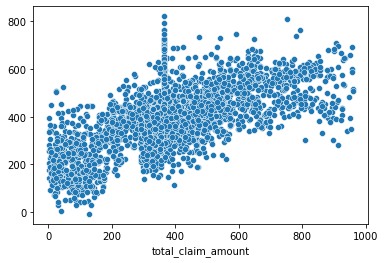

In [19]:
sns.scatterplot(y = predictions, x = y_test)

In [ ]:
#Great! Now define a function that takes a list of models and train (and tests) them so we can try a lot of them without repeating code.

In [ ]:
##model= LinearRegression()
##model.fit(X_train, y_train)

In [36]:
from sklearn.neighbors import KNeighborsRegressor


In [ ]:
#knn_model = KNeighborsRegressor(n_neighbors=4) # The keyword "n_neighbors" is what sets the K.
#knn_model.fit(X_train, y_train)

In [ ]:
for i in range(2,10): 
    model = KNeighborsRegressor(n_neighbors=i)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

In [53]:
def test (y, X, model):
    
    for i in model:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
        i.fit(X_train, y_train)
        predictions = i.predict(X_test)
        score = i.score(X_test, y_test)
        print (i, score)

In [62]:
model = KNeighborsRegressor(n_neighbors=5)

model.fit(train_X, train_y)

test_predictions = model.predict(test_X)
print(test_y, test_predictions)

2182    336.000000
7823    489.600000
1651    571.200000
888     364.800000
3844    907.200000
           ...    
8279    619.267164
3445     49.451117
1555    364.800000
2067    699.615192
768     312.000000
Name: total_claim_amount, Length: 2284, dtype: float64 [338.8152872 173.3087074 242.8462646 ... 516.4100086 465.5461218
 372.7372656]


In [ ]:
#You can check also the MLPRegressor for this task!


In [63]:
from sklearn.neural_network import MLPRegressor


In [74]:
model_mlp = MLPRegressor(random_state=1, max_iter=5000)


In [75]:
model_mlp.fit(X_train, y_train)

MLPRegressor(max_iter=5000, random_state=1)

In [76]:
model_mlp.score(X,y)

0.3678916313268865

In [79]:
predictions_mlp = model_mlp.predict(X_test)

In [80]:
r2=  r2_score(y_test, predictions)
RMSE = mean_squared_error(y_test,predictions_mlp, squared=False)
MSE =  mean_squared_error(y_test, predictions_mlp)
MAE = mean_absolute_error(y_test,predictions_mlp)

In [81]:
print ("R2 is:",r2)
print ("RMSE is:",RMSE)
print ("MSE is:",MSE)
print ("MAE is:",MAE)

R2 is: 0.37202903247773367
RMSE is: 166.37798841117282
MSE is: 27681.635027748358
MAE is: 132.75356003632373


<AxesSubplot:xlabel='total_claim_amount'>

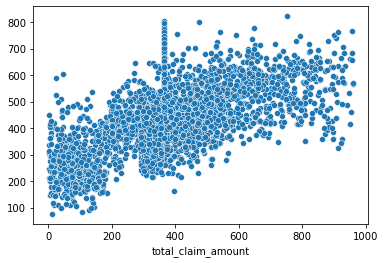

In [83]:
sns.scatterplot(y = predictions_mlp, x = y_test)